# Importation des librairies

In [1]:
import pandas as pd
###librairie pour les représentations graphiques
import matplotlib.pyplot as plt 
from scipy import stats

# Import du fichier 

In [2]:
Data=pd.read_csv('iris.csv')

### Affichage des dix premières lignes

In [3]:

Data.head(5)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Affichage des dix dernières lignes

In [4]:
Data.tail(7)

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Connaître la taille de la base de données

In [5]:
Data.shape

(150, 5)

La base de données contient 150 observations, 4 variables explicatives et une réponse.

# Renommer les variables

In [6]:
Data=Data.rename(columns={
    'SepalLength':'longueur du sépale',
    'SepalWidth':'largeur du sépale',
    'PetalLength': 'longueur du pétale',
    'PetalWidth':'largeur du pétale'
})
Data.head(5)

,longueur du sépale,largeur du sépale,longueur du pétale,largeur du pétale,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Détection des doublons

In [7]:
Data_new=Data.copy()

In [8]:
len(Data_new)-len(Data_new.drop_duplicates())

3

In [9]:
Data_new[Data_new.duplicated()]

,longueur du sépale,largeur du sépale,longueur du pétale,largeur du pétale,Name
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [10]:
Data_new=Data_new.drop_duplicates()

In [11]:
Data_new.shape

(147, 5)

# Détection des données manquantes

In [12]:
Data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longueur du sépale  147 non-null    float64
 1   largeur du sépale   147 non-null    float64
 2   longueur du pétale  147 non-null    float64
 3   largeur du pétale   147 non-null    float64
 4   Name                147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [13]:
Data_new.isna().sum()

longueur du sépale    0
largeur du sépale     0
longueur du pétale    0
largeur du pétale     0
Name                  0
dtype: int64

In [14]:
Data_new.isnull().sum()

longueur du sépale    0
largeur du sépale     0
longueur du pétale    0
largeur du pétale     0
Name                  0
dtype: int64

# Données aberrantes

### Séparer les variables explicatives de la réponse

In [15]:
Data_new.columns

Index(['longueur du sépale', 'largeur du sépale', 'longueur du pétale',
       'largeur du pétale', 'Name'],
      dtype='object')

In [16]:
X=Data_new[Data_new.columns[:4]]
X.head(5)

,longueur du sépale,largeur du sépale,longueur du pétale,largeur du pétale
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [17]:
y=Data_new[Data_new.columns[4]]
y.head(5)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Name, dtype: object

In [18]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)
    Draw a box and whisker plot.
    
    The box extends from the first quartile (Q1) to the third
    quartile (Q3) of the data, with a line at the median.  The
    whiskers extend from the box by 1.5x the inter-quartile range
    (IQR).  Flier points are those past the end of the whiskers.
    See https://en.wikipedia.org/wiki/Box_plot for reference.
    
    .. code-block:: none
    
              Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                           |-----:-----|
           o      |--------|     :     |--------

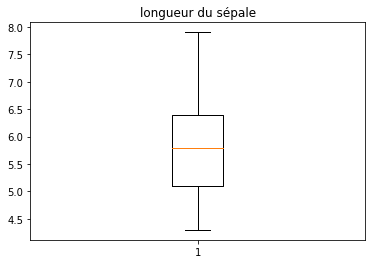

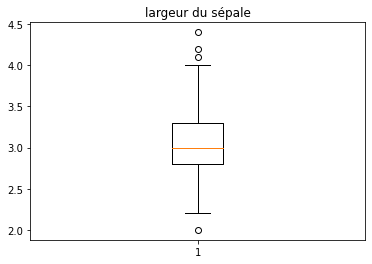

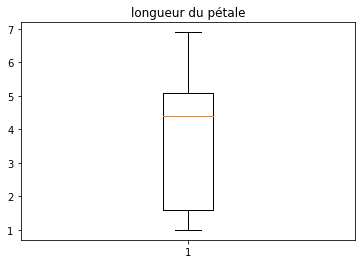

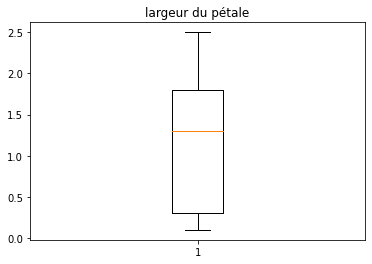

In [19]:
for x in Data_new.columns[:4]:
    plt.figure()
    plt.boxplot(Data_new[x])
    plt.title(x)
    plt.show()

# Sous bases

In [20]:
setosa=Data_new[y=='Iris-setosa']
setosa.shape

(48, 5)

In [21]:
versicolor=Data_new[y=='Iris-versicolor']
versicolor.shape

(50, 5)

In [22]:
virginica=Data_new[y=='Iris-virginica']
virginica.shape

(49, 5)

In [23]:
help(plt.pie)

Help on function pie in module matplotlib.pyplot:

pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=0, radius=1, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, *, normalize=True, data=None)
    Plot a pie chart.
    
    Make a pie chart of array *x*.  The fractional area of each wedge is
    given by ``x/sum(x)``.  If ``sum(x) < 1``, then the values of *x* give
    the fractional area directly and the array will not be normalized. The
    resulting pie will have an empty wedge of size ``1 - sum(x)``.
    
    The wedges are plotted counterclockwise, by default starting from the
    x-axis.
    
    Parameters
    ----------
    x : 1D array-like
        The wedge sizes.
    
    explode : array-like, default: None
        If not *None*, is a ``len(x)`` array which specifies the fraction
        of the radius with which to offset each wedge.
    
    labels : li

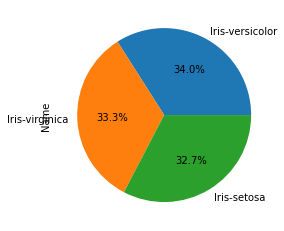

In [24]:
Data_new['Name'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

# Indépendances des variables 

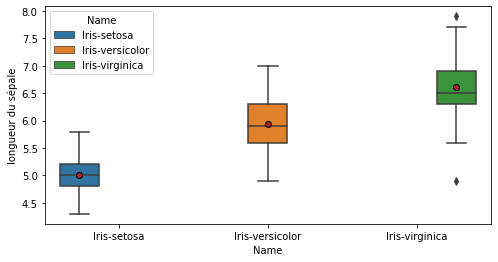

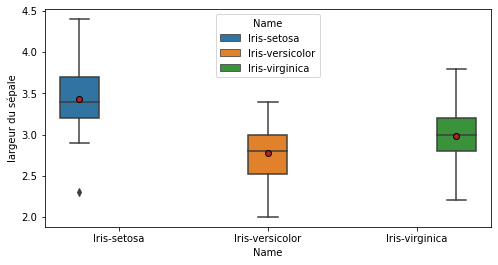

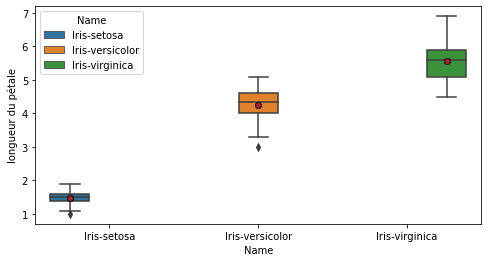

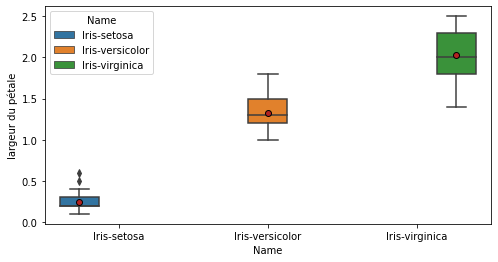

In [25]:
import seaborn as sns
for x in Data_new.columns[:4]:
    plt.figure(figsize=(8,4))
    meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
    sns.boxplot(x='Name',y=x,data=Data_new,showmeans=True, meanprops=meanprops,hue='Name')
    plt.show()

### Analyse descriptive

In [26]:
setosa.describe()

,longueur du sépale,largeur du sépale,longueur du pétale,largeur du pétale
count,48.000000,48.000000,48.000000,48.000000
mean,5.010417,3.431250,1.462500,0.250000
std,0.359219,0.383243,0.177002,0.105185
min,4.300000,2.300000,1.000000,0.100000
25%,4.800000,3.200000,1.400000,0.200000
50%,5.000000,3.400000,1.500000,0.200000
75%,5.200000,3.700000,1.600000,0.300000
max,5.800000,4.400000,1.900000,0.600000


In [27]:
versicolor.describe()

,longueur du sépale,largeur du sépale,longueur du pétale,largeur du pétale
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


In [28]:
virginica.describe()

,longueur du sépale,largeur du sépale,longueur du pétale,largeur du pétale
count,49.000000,49.000000,49.000000,49.000000
mean,6.604082,2.979592,5.561224,2.028571
std,0.632113,0.323380,0.553706,0.276887
min,4.900000,2.200000,4.500000,1.400000
25%,6.300000,2.800000,5.100000,1.800000
50%,6.500000,3.000000,5.600000,2.000000
75%,6.900000,3.200000,5.900000,2.300000
max,7.900000,3.800000,6.900000,2.500000


In [29]:
help(stats.kruskal)

Help on function kruskal in module scipy.stats.stats:

kruskal(*args, nan_policy='propagate')
    Compute the Kruskal-Wallis H-test for independent samples.
    
    The Kruskal-Wallis H-test tests the null hypothesis that the population
    median of all of the groups are equal.  It is a non-parametric version of
    ANOVA.  The test works on 2 or more independent samples, which may have
    different sizes.  Note that rejecting the null hypothesis does not
    indicate which of the groups differs.  Post hoc comparisons between
    groups are required to determine which groups are different.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
       Two or more arrays with the sample measurements can be given as
       arguments. Samples must be one-dimensional.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'pro

In [30]:
vect_stat=[]
vect_pval=[]
for x in Data_new.columns[:4]:
    stat, pv=stats.kruskal(setosa[x],versicolor[x],virginica[x])
    vect_stat.append(stat)
    vect_pval.append(pv)
    
res=pd.DataFrame({
    'variable': Data_new.columns[:4],
    'statistique':vect_stat,
    'p-valeur':vect_pval
})

res

,variable,statistique,p-valeur
0,longueur du sépale,94.566718,2.918087e-21
1,largeur du sépale,61.921377,3.580501e-14
2,longueur du pétale,127.653832,1.906876e-28
3,largeur du pétale,128.375860,1.329034e-28


### Test d'ANOVA

In [31]:
from scipy.stats import f_oneway
help(f_oneway)

Help on function f_oneway in module scipy.stats.stats:

f_oneway(*args, axis=0)
    Perform one-way ANOVA.
    
    The one-way ANOVA tests the null hypothesis that two or more groups have
    the same population mean.  The test is applied to samples from two or
    more groups, possibly with differing sizes.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample measurements for each group.  There must be at least
        two arguments.  If the arrays are multidimensional, then all the
        dimensions of the array must be the same except for `axis`.
    axis : int, optional
        Axis of the input arrays along which the test is applied.
        Default is 0.
    
    Returns
    -------
    statistic : float
        The computed F statistic of the test.
    pvalue : float
        The associated p-value from the F distribution.
    
    Warns
    -----
    F_onewayConstantInputWarning
        Raised if each of the input arrays is constant arra

In [32]:
s=[]
p=[]
for var in Data_new.columns[:4]:
    st,pv=f_oneway(setosa[var],versicolor[var],virginica[var])
    s.append(st)
    p.append(pv)
RES=pd.DataFrame({
    'variable':Data_new.columns[:4],
    'statistique':s,
    'p valeur':p
})
RES

,variable,statistique,p valeur
0,longueur du sépale,116.672939,7.530912e-31
1,largeur du sépale,47.869839,1.150338e-16
2,longueur du pétale,1132.387047,8.180546e-89
3,largeur du pétale,915.183585,1.352973e-82


In [33]:
CORRELATION=X.corr()
print(CORRELATION)

                    longueur du sépale  largeur du sépale  longueur du pétale  \
longueur du sépale            1.000000          -0.109321            0.871305   
largeur du sépale            -0.109321           1.000000           -0.421057   
longueur du pétale            0.871305          -0.421057            1.000000   
largeur du pétale             0.817058          -0.356376            0.961883   

                    largeur du pétale  
longueur du sépale           0.817058  
largeur du sépale           -0.356376  
longueur du pétale           0.961883  
largeur du pétale            1.000000  


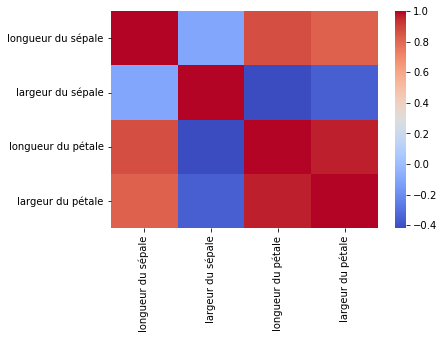

In [34]:
import seaborn as sns

plt.figure()
sns.heatmap(CORRELATION, cmap = 'coolwarm')
plt.show()

In [35]:
Data_new[Data_new.columns[:4]].corr()

,longueur du sépale,largeur du sépale,longueur du pétale,largeur du pétale
longueur du sépale,1.000000,-0.109321,0.871305,0.817058
largeur du sépale,-0.109321,1.000000,-0.421057,-0.356376
longueur du pétale,0.871305,-0.421057,1.000000,0.961883
largeur du pétale,0.817058,-0.356376,0.961883,1.000000


In [36]:
help(sns.pairplot)

Help on function pairplot in module seaborn.axisgrid:

pairplot(data, *, hue=None, hue_order=None, palette=None, vars=None, x_vars=None, y_vars=None, kind='scatter', diag_kind='auto', markers=None, height=2.5, aspect=1, corner=False, dropna=False, plot_kws=None, diag_kws=None, grid_kws=None, size=None)
    Plot pairwise relationships in a dataset.
    
    By default, this function will create a grid of Axes such that each numeric
    variable in ``data`` will by shared across the y-axes across a single row and
    the x-axes across a single column. The diagonal plots are treated
    differently: a univariate distribution plot is drawn to show the marginal
    distribution of the data in each column.
    
    It is also possible to show a subset of variables or plot different
    variables on the rows and columns.
    
    This is a high-level interface for :class:`PairGrid` that is intended to
    make it easy to draw a few common styles. You should use :class:`PairGrid`
    directly 

In [37]:
Data_new

,longueur du sépale,largeur du sépale,longueur du pétale,largeur du pétale,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<Figure size 432x288 with 0 Axes>

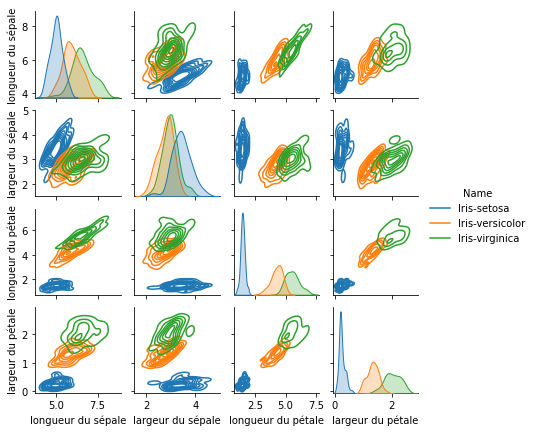

In [38]:
plt.figure()
sns.pairplot(Data_new,hue='Name',kind='kde',diag_kind='kde',height=1.5)
plt.show()

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [40]:
help(variance_inflation_factor)

Help on function variance_inflation_factor in module statsmodels.stats.outliers_influence:

variance_inflation_factor(exog, exog_idx)
    Variance inflation factor, VIF, for one exogenous variable
    
    The variance inflation factor is a measure for the increase of the
    variance of the parameter estimates if an additional variable, given by
    exog_idx is added to the linear regression. It is a measure for
    multicollinearity of the design matrix, exog.
    
    One recommendation is that if VIF is greater than 5, then the explanatory
    variable given by exog_idx is highly collinear with the other explanatory
    variables, and the parameter estimates will have large standard errors
    because of this.
    
    Parameters
    ----------
    exog : {ndarray, DataFrame}
        design matrix with all explanatory variables, as for example used in
        regression
    exog_idx : int
        index of the exogenous variable in the columns of exog
    
    Returns
    -------
  

### Calcul des VIF entre les variables explicatives

In [41]:
Tab=[]
for l in range(Data_new[Data_new.columns[:4]].shape[1]):
    print(X.columns[l],':',variance_inflation_factor(X,l))

longueur du sépale : 261.7454113193502
largeur du sépale : 95.58956312539743
longueur du pétale : 172.07046420032623
largeur du pétale : 55.200866406913846


### Etude de normalité des variables 

array([[<AxesSubplot:title={'center':'longueur du sépale'}>,
        <AxesSubplot:title={'center':'largeur du sépale'}>],
       [<AxesSubplot:title={'center':'longueur du pétale'}>,
        <AxesSubplot:title={'center':'largeur du pétale'}>]], dtype=object)

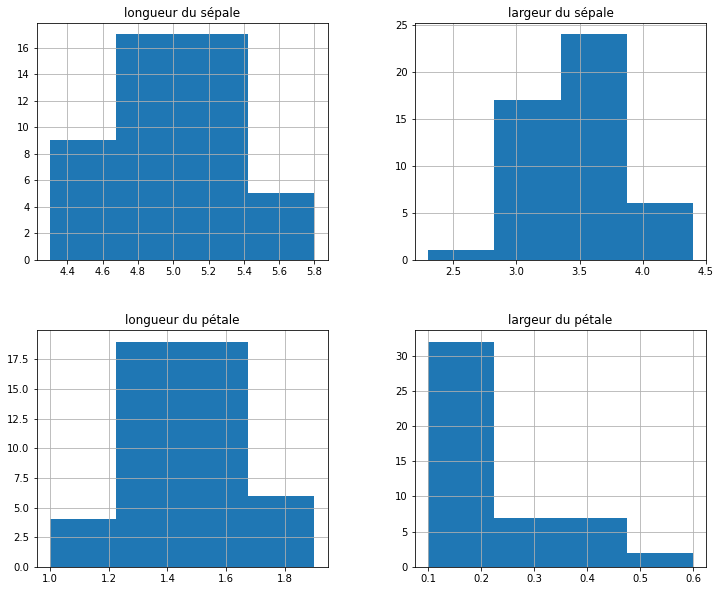

In [42]:
setosa.hist(bins = 4,rwidth = 1,figsize=(12,10))

array([[<AxesSubplot:title={'center':'longueur du sépale'}>,
        <AxesSubplot:title={'center':'largeur du sépale'}>],
       [<AxesSubplot:title={'center':'longueur du pétale'}>,
        <AxesSubplot:title={'center':'largeur du pétale'}>]], dtype=object)

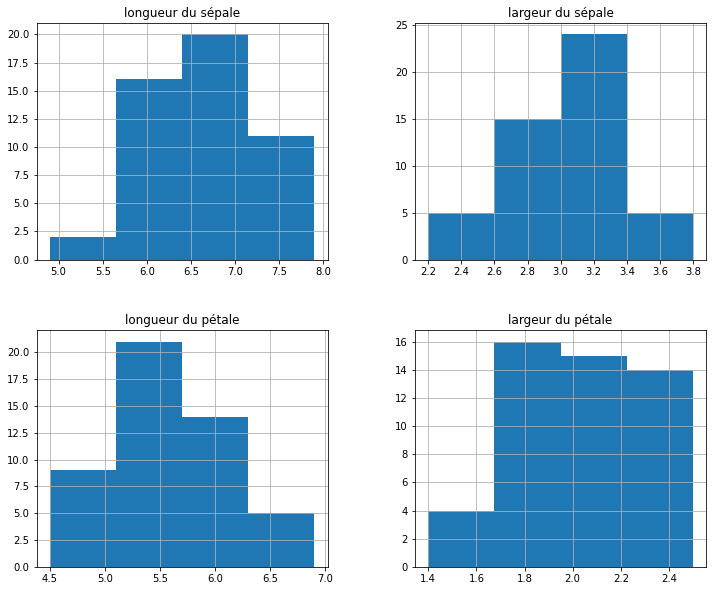

In [43]:
virginica.hist(bins = 4,rwidth = 1,figsize=(12,10))

array([[<AxesSubplot:title={'center':'longueur du sépale'}>,
        <AxesSubplot:title={'center':'largeur du sépale'}>],
       [<AxesSubplot:title={'center':'longueur du pétale'}>,
        <AxesSubplot:title={'center':'largeur du pétale'}>]], dtype=object)

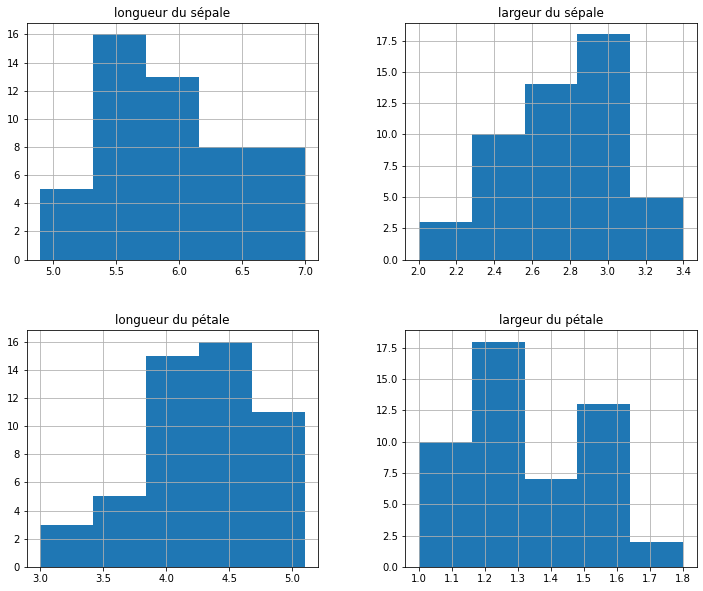

In [44]:
versicolor.hist(bins = 5,rwidth = 1,figsize=(12,10))

### Explication sur les lois normales

In [45]:
import numpy as np
D=pd.DataFrame(np.random.normal(loc=0,scale=1,size=50000))

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

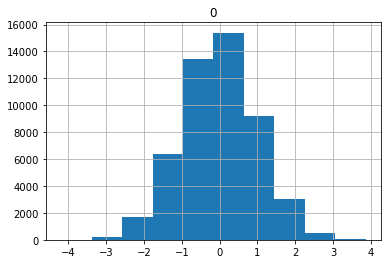

In [46]:
D.hist(bins=10)

In [47]:
from scipy.stats import skew, kurtosis
print(skew(D),kurtosis(D))

[-0.01243087] [-0.00178366]


In [48]:
###setosa
sk=[]
kurt=[]
for var in setosa.columns[:4]:
    sk.append(skew(setosa[var]))
    kurt.append(kurtosis(setosa[var]))
    
res=pd.DataFrame({'variable': setosa.columns[:4],
                'Skewness' : sk,
                 'Kurtosis':kurt})
res

,variable,Skewness,Kurtosis
0,longueur du sépale,0.078589,-0.437388
1,largeur du sépale,0.026116,0.725381
2,longueur du pétale,0.093784,0.677255
3,largeur du pétale,1.219437,1.384615


In [49]:
###virginica
sk1=[]
kurt1=[]
for var in virginica.columns[:4]:
    sk1.append(skew(virginica[var]))
    kurt1.append(kurtosis(virginica[var]))
    
res1=pd.DataFrame({'variable': virginica.columns[:4],
                'Skewness' : sk1,
                 'Kurtosis':kurt1})
res1

,variable,Skewness,Kurtosis
0,longueur du sépale,0.082602,-0.018327
1,largeur du sépale,0.319770,0.520322
2,longueur du pétale,0.499664,-0.279413
3,largeur du pétale,-0.151286,-0.683660


In [50]:
###versicolor
sk2=[]
kurt2=[]
for var in versicolor.columns[:4]:
    sk2.append(skew(versicolor[var]))
    kurt2.append(kurtosis(versicolor[var]))
    
res2=pd.DataFrame({'variable': versicolor.columns[:4],
                'Skewness' : sk2,
                 'Kurtosis':kurt2})
res2

,variable,Skewness,Kurtosis
0,longueur du sépale,0.102190,-0.598827
1,largeur du sépale,-0.351867,-0.448272
2,longueur du pétale,-0.588159,-0.074402
3,largeur du pétale,-0.030236,-0.487833


### Test de Shapiro

In [51]:
from scipy import stats

In [52]:
help(stats.shapiro)

Help on function shapiro in module scipy.stats.morestats:

shapiro(x)
    Perform the Shapiro-Wilk test for normality.
    
    The Shapiro-Wilk test tests the null hypothesis that the
    data was drawn from a normal distribution.
    
    Parameters
    ----------
    x : array_like
        Array of sample data.
    
    Returns
    -------
    statistic : float
        The test statistic.
    p-value : float
        The p-value for the hypothesis test.
    
    See Also
    --------
    anderson : The Anderson-Darling test for normality
    kstest : The Kolmogorov-Smirnov test for goodness of fit.
    
    Notes
    -----
    The algorithm used is described in [4]_ but censoring parameters as
    described are not implemented. For N > 5000 the W test statistic is accurate
    but the p-value may not be.
    
    The chance of rejecting the null hypothesis when it is true is close to 5%
    regardless of sample size.
    
    References
    ----------
    .. [1] https://www.itl.nist.

In [53]:
stat_v=[]
pv=[]
for var in setosa.columns[:4]:
    st, p=stats.shapiro(setosa[var])
    stat_v.append(st)
    pv.append(p)
    
Gd=pd.DataFrame({'VARIABLE':setosa.columns[:4],
                'STAT': stat_v,
                'PVALEUR': pv})
    
Gd

,VARIABLE,STAT,PVALEUR
0,longueur du sépale,0.976371,0.437932
1,largeur du sépale,0.971323,0.284990
2,longueur du pétale,0.958571,0.088382
3,largeur du pétale,0.795648,0.000001


In [54]:
setosa.shape

(48, 5)

In [55]:
stat_v1=[]
pv1=[]
for var in virginica.columns[:4]:
    st, p=stats.shapiro(virginica[var])
    stat_v1.append(st)
    pv1.append(p)
    
Hd=pd.DataFrame({'VARIABLE':virginica.columns[:4],
                'STAT': stat_v1,
                'PVALEUR': pv1})
    
Hd

,VARIABLE,STAT,PVALEUR
0,longueur du sépale,0.970493,0.253321
1,largeur du sépale,0.967216,0.187170
2,longueur du pétale,0.965525,0.159741
3,largeur du pétale,0.958836,0.084841


In [56]:
stat_v2=[]
pv2=[]
for var in versicolor.columns[:4]:
    st, p=stats.shapiro(versicolor[var])
    stat_v2.append(st)
    pv2.append(p)
    
Td=pd.DataFrame({'VARIABLE':versicolor.columns[:4],
                'STAT': stat_v2,
                'PVALEUR': pv2})
    
Td

,VARIABLE,STAT,PVALEUR
0,longueur du sépale,0.977836,0.464733
1,largeur du sépale,0.974133,0.337989
2,longueur du pétale,0.966005,0.158483
3,largeur du pétale,0.947627,0.027278


# Echantillonnage Train set -test set

In [104]:
from sklearn.model_selection import train_test_split, cross_val_score

In [58]:
help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation and
    ``next(ShuffleSplit().split(X, y))`` and application to input data
    into a single call for splitting (and optionally subsampling) data in a
    oneliner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to 

In [68]:
X_train, X_test, y_train,y_test=train_test_split(X[X.columns[:4]],y, test_size=0.30, random_state=42)

In [71]:
X_test.shape

(45, 4)

# Modélisation

In [72]:
from sklearn.naive_bayes import BernoulliNB

In [73]:
help(BernoulliNB)

Help on class BernoulliNB in module sklearn.naive_bayes:

class BernoulliNB(_BaseDiscreteNB)
 |  BernoulliNB(*, alpha=1.0, binarize=0.0, fit_prior=True, class_prior=None)
 |  
 |  Naive Bayes classifier for multivariate Bernoulli models.
 |  
 |  Like MultinomialNB, this classifier is suitable for discrete data. The
 |  difference is that while MultinomialNB works with occurrence counts,
 |  BernoulliNB is designed for binary/boolean features.
 |  
 |  Read more in the :ref:`User Guide <bernoulli_naive_bayes>`.
 |  
 |  Parameters
 |  ----------
 |  alpha : float, default=1.0
 |      Additive (Laplace/Lidstone) smoothing parameter
 |      (0 for no smoothing).
 |  
 |  binarize : float or None, default=0.0
 |      Threshold for binarizing (mapping to booleans) of sample features.
 |      If None, input is presumed to already consist of binary vectors.
 |  
 |  fit_prior : bool, default=True
 |      Whether to learn class prior probabilities or not.
 |      If false, a uniform prior wil

### Modèle 1

In [74]:
model=BernoulliNB()
model.fit(X_train, y_train)
model.get_params()

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
help(accuracy_score)

Help on function accuracy_score in module sklearn.metrics._classification:

accuracy_score(y_true, y_pred, *, normalize=True, sample_weight=None)
    Accuracy classification score.
    
    In multilabel classification, this function computes subset accuracy:
    the set of labels predicted for a sample must *exactly* match the
    corresponding set of labels in y_true.
    
    Read more in the :ref:`User Guide <accuracy_score>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) labels.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Predicted labels, as returned by a classifier.
    
    normalize : bool, default=True
        If ``False``, return the number of correctly classified samples.
        Otherwise, return the fraction of correctly classified samples.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.
    
    Ret

In [77]:
y_pred=model.predict(X_test)

In [81]:
y_test

127     Iris-virginica
53     Iris-versicolor
140     Iris-virginica
19         Iris-setosa
106     Iris-virginica
12         Iris-setosa
78     Iris-versicolor
31         Iris-setosa
83     Iris-versicolor
9          Iris-setosa
26         Iris-setosa
98     Iris-versicolor
146     Iris-virginica
69     Iris-versicolor
136     Iris-virginica
68     Iris-versicolor
18         Iris-setosa
71     Iris-versicolor
126     Iris-virginica
30         Iris-setosa
29         Iris-setosa
107     Iris-virginica
38         Iris-setosa
120     Iris-virginica
57     Iris-versicolor
22         Iris-setosa
66     Iris-versicolor
135     Iris-virginica
84     Iris-versicolor
11         Iris-setosa
137     Iris-virginica
47         Iris-setosa
121     Iris-virginica
27         Iris-setosa
4          Iris-setosa
129     Iris-virginica
131     Iris-virginica
148     Iris-virginica
44         Iris-setosa
16         Iris-setosa
10         Iris-setosa
117     Iris-virginica
87     Iris-versicolor
141     Iri

In [80]:
y_pred

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor'],
      dtype='<U15')

In [85]:
accuracy_score(y_test,y_pred)

0.26666666666666666

In [84]:
print(X_test.shape[0],accuracy_score(y_test,y_pred)*X_test.shape[0])

45 12.0


In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [87]:
help(confusion_matrix)

Help on function confusion_matrix in module sklearn.metrics._classification:

confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)
    Compute confusion matrix to evaluate the accuracy of a classification.
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.
    
    y_pred : array-like of shape (n_samples,)
        Estimated targets as returned by a classifier.
    
    labels : array-like of shape (n_classes), default=

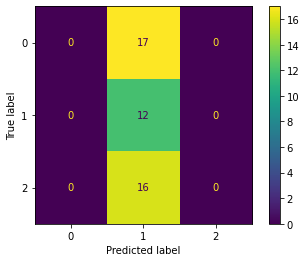

In [89]:
Mat=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(Mat).plot()

### Modèle 2

In [90]:
from sklearn.naive_bayes import GaussianNB

In [91]:
model2=GaussianNB()
model2.fit(X_train,y_train)
model2.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [92]:
yn_pred=model2.predict(X_test)

In [93]:
yn_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor'], dtype='<U15')

In [95]:
print(X_test.shape[0],accuracy_score(y_test,yn_pred)*X_test.shape[0])

45 44.0


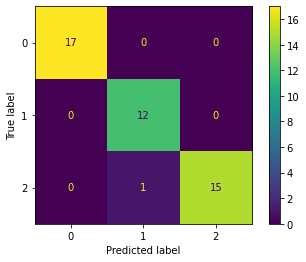

In [97]:
Mat1=confusion_matrix(y_test,yn_pred)
ConfusionMatrixDisplay(Mat1).plot()

### Modèle 3

In [98]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [99]:
help(LinearDiscriminantAnalysis)

Help on class LinearDiscriminantAnalysis in module sklearn.discriminant_analysis:

class LinearDiscriminantAnalysis(sklearn.linear_model._base.LinearClassifierMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  LinearDiscriminantAnalysis(solver='svd', shrinkage=None, priors=None, n_components=None, store_covariance=False, tol=0.0001, covariance_estimator=None)
 |  
 |  Linear Discriminant Analysis.
 |  
 |  A classifier with a linear decision boundary, generated by fitting class
 |  conditional densities to the data and using Bayes' rule.
 |  
 |  The model fits a Gaussian density to each class, assuming that all classes
 |  share the same covariance matrix.
 |  
 |  The fitted model can also be used to reduce the dimensionality of the input
 |  by projecting it to the most discriminative directions, using the
 |  `transform` method.
 |  
 |  .. versionadded:: 0.17
 |     *LinearDiscriminantAnalysis*.
 |  
 |  Read more in the :ref:`User Guide <lda_qda>`.
 |  
 |  Par

In [100]:
model3=LinearDiscriminantAnalysis()
model3.fit(X_train,y_train)
model3.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [101]:
yo=model3.predict(X_test)
accuracy_score(y_test,yo)

0.9777777777777777

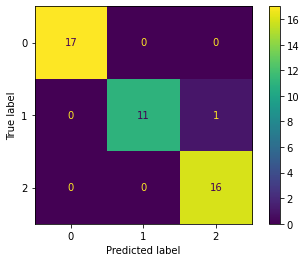

In [103]:
confusion_matrix(y_test,yo)
ConfusionMatrixDisplay(confusion_matrix(y_test,yo)).plot()

In [105]:
help(cross_val_score)

Help on function cross_val_score in module sklearn.model_selection._validation:

cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)
    Evaluate a score by cross-validation.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitting the dataset into
        train/test set. Only used in conjunction with a "Group" :term:`cv

In [118]:
print(cross_val_score(model2, X, y, cv=8),'\n',\
      cross_val_score(model3, X, y, cv=8))

[0.89473684 0.94736842 1.         0.88888889 0.94444444 0.88888889
 1.         1.        ] 
 [1.         1.         1.         0.94444444 1.         0.88888889
 1.         1.        ]
